In [1]:
!pip install torch
!pip install torchvision

In [11]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_validate,train_test_split
import matplotlib.pyplot as plt

In [3]:
transformer = transforms.Compose([
                               torchvision.transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
                             ])

In [4]:
train_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=True, download=True,
                             transform=transformer)

test_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=False, download=True,
                             transform=transformer)

batch_size_train= len(train_set)//5
batch_size_test=len(test_set)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./files/fashion-mnist/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./files/fashion-mnist/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./files/fashion-mnist/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./files/fashion-mnist/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./files/fashion-mnist/FashionMNIST\raw



In [5]:
train_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  test_set,
  batch_size=batch_size_test, shuffle=True)

In [6]:
train_enumerated = enumerate(train_loader)
batch_idx, (train_x, train_y) = next(train_enumerated)

test_enumerated = enumerate(test_loader)
batch_idx, (test_x, test_y) = next(test_enumerated)

In [10]:
train_x.shape

torch.Size([12000, 784])

In [8]:
train_x[1].shape

torch.Size([784])

# Models


In [20]:
model_lbls = [
              'Polynomial', 'RBF', 'Sigmoid','Linear' 
            ]

models = {
    'Polynomial': {'name': 'SVM Polynomial Kernel',
           'estimator': SVC(kernel='poly'), 
           'param': [{'degree': [8]}],
          },
    'RBF': {'name': 'SVM RBF Kernel',
           'estimator': SVC(kernel= 'rbf'),
           'param': [{}]
          },
    'Sigmoid': {'name': 'SVM Sigmoid Kernel',
           'estimator': SVC(kernel= 'sigmoid'),
           'param': [{}],
          },
    'Linear':{'name': 'SVM Linear Kernel',
           'estimator': SVC(kernel= 'linear'), 
           'param': [{}]
          },
}

scores = ['precision', 'recall','f1']

In [13]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    true_y, pred_y = test_y, model.predict(test_x)
    print(classification_report(true_y, pred_y))
    print()

In [14]:

def evaluate_models(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
                               return_train_score = False,
                               n_jobs = 2, 
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [21]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model SVM Polynomial Kernel
Best parameters set found on train set:

{'degree': 8}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1000
           1       0.96      0.87      0.91      1000
           2       0.69      0.59      0.64      1000
           3       0.87      0.70      0.78      1000
           4       0.75      0.67      0.71      1000
           5       0.42      0.95      0.58      1000
           6       0.56      0.50      0.53      1000
           7       0.90      0.66      0.76      1000
           8       0.93      0.85      0.89      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.73     1000

Best parameters set found on train set:

{'degree': 8}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1000
           1       0.96      0.87      0.91      1000
           2       0.69      0.59      0.64      1000
           3       0.87      0.70      0.78      1000
           4       0.75      0.67      0.71      1000
           5       0.42      0.95      0.58      1000
           6       0.56      0.50      0.53      1000
           7       0.90      0.66      0.76      1000
           8       0.93      0.85      0.89      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.73     10000
   macro avg       0.78      0.73      0.74     10000
weighted avg       0.78      0.73      0.74     10000


-----

As we can see the Linear and RBF kernels outperform the Sigmoid by a big margin. The Polynomial kernel, on the other hand isn't far off from them, meaning it's results could be better by ajusting the input parameters of the degree.

In [36]:
models = {
    'Polynomial': {'name': 'SVM Polynomial Kernel',
           'estimator': SVC(), 
           'param': [{
                   'kernel':["poly"],
                   'degree': [1,2,3,4,5,6,7,8,9,10],
           }]
          },
    'RBF': {'name': 'SVM RBF Kernel',
           'estimator': SVC(),
           'param': [{
                   'kernel':['rbf'],
                   'C': [0.1,1.0,10.0,100.0],
                    'gamma':[1.0,0.1,0.01,0.001],
               
           }]
          },
    'Linear':{'name': 'SVM Linear Kernel',
           'estimator': SVC(), 
           'param': [{
                    'kernel': ['linear'],
                    'C': [0.1,1.0,10.0,100.0],
           }]
          },
}

model_lbls = ['Polynomial','RBF','Linear']
scores = ['f1']

In [37]:
evaluate_models(models)

# Tuning hyper-parameters for f1

----------------------------------------
Trying model SVM Polynomial Kernel
Best parameters set found on train set:

{'degree': 2, 'kernel': 'poly'}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.73      0.74      1000
           3       0.86      0.85      0.85      1000
           4       0.77      0.73      0.75      1000
           5       0.86      0.94      0.90      1000
           6       0.60      0.60      0.60      1000
           7       0.90      0.90      0.90      1000
           8       0.95      0.94      0.94      1000
           9       0.95      0.92      0.94      1000

    accuracy                           0.

In [38]:
def plot_scores_by_parameter(model,ks,X_train,X_test,y_train,y_test,visualize=True):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = model(k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    if visualize:
        plt.figure(figsize=(10, 6))
        plt.plot(ks, train_scores, color='blue', label='train score')
        plt.plot(ks, test_scores, color='green', label='test score')
        plt.legend()
    return train_scores,test_scores

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, random_state=0)

In [45]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = 2,gamma = a)

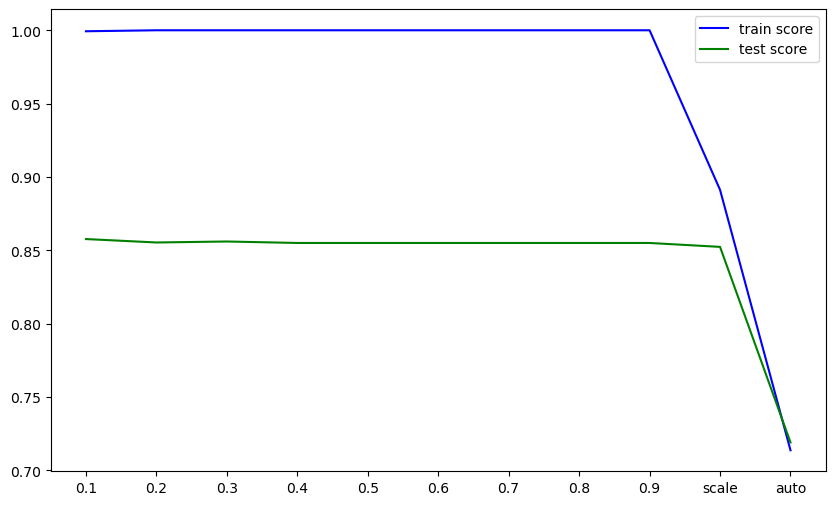

In [46]:
_=plot_scores_by_parameter(poly_constructor,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"scale","auto"],X_train,X_valid,y_train,y_valid)

In [47]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = a,gamma = 'scale')

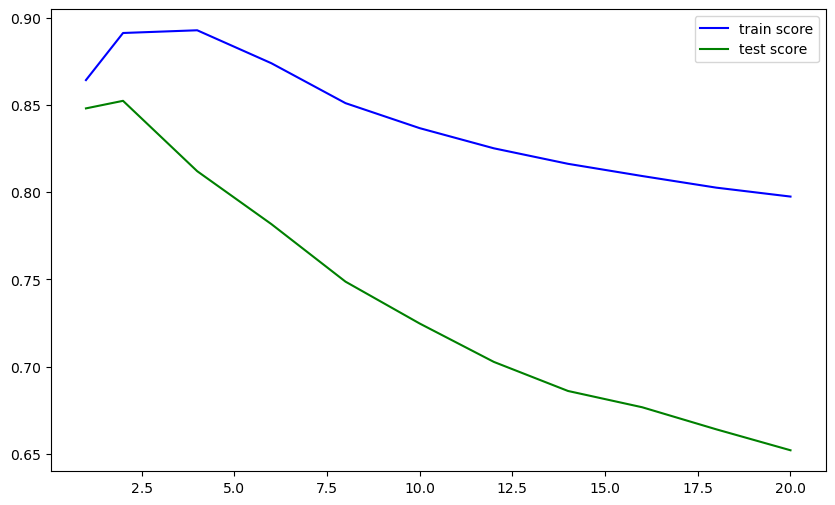

In [50]:
_=plot_scores_by_parameter(poly_constructor,[1,2,4,6,8,10,12,14,16,18,20],X_train,X_valid,y_train,y_valid)

In [15]:
from sklearn.model_selection import cross_val_score


In [12]:
scores = []

clf = svm.SVC()
    
with warnings.catch_warnings(record=True):
    score = cross_val_score(
            clf,
            train_x,
            train_y, 
            cv=5
        )
    scores.append(score.mean())

In [15]:
ovo = svm.SVC(decision_function_shape='ovo')
    
with warnings.catch_warnings(record=True):
    score = cross_val_score(
            ovo,
            train_x,
            train_y, 
            cv=5
        )
    scores.append(score.mean())

In [14]:
ovr = svm.SVC(decision_function_shape='ovr')
    
with warnings.catch_warnings(record=True):
    score = cross_val_score(
            ovr,
            train_x,
            train_y, 
            cv=5
        )
    scores.append(score.mean())

In [16]:
linear = svm.LinearSVC()
    
with warnings.catch_warnings(record=True):
    score = cross_val_score(
            linear,
            train_x,
            train_y, 
            cv=5
        )
    scores.append(score.mean())

LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option multi_class='crammer_singer'. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less. Using the Crammer and Singer formula is extremely slow for big datasets.

In [ ]:
fast_linear = svm.LinearSVC(multi_class='crammer_singer')
    
with warnings.catch_warnings(record=True):
    score = cross_val_score(
            fast_linear,
            train_x,
            train_y, 
            cv=5
        )
    scores.append(score.mean())

In [17]:
scores

[0.8535, 0.8535, 0.8535, 0.8019999999999999]

In [23]:
kernel_scores = []
gammas = [i/10 + 0.1 for i in range(10)]
cs = []

for number in gammas:
    clf = svm.SVC(kernel="rbf",gamma=number,C=1.0)
    
    with warnings.catch_warnings(record=True):
        score = cross_val_score(
                clf,
                train_x,
                train_y, 
                cv=5
            )
        kernel_scores.append(score.mean())

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.9
1.0


In [24]:
kernel_scores

[0.7671666666666667,
 0.5416666666666666,
 0.37700000000000006,
 0.25,
 0.195,
 0.16266666666666665,
 0.14583333333333334,
 0.13216666666666665,
 0.12250000000000001,
 0.11516666666666667]

In [16]:
kernel_scores = []
cs = [1/10*(i+1)  for i in range(10)]

for number in cs:
    clf = svm.SVC(kernel="rbf",gamma='auto',C=number)
    
    with warnings.catch_warnings(record=True):
        score = cross_val_score(
                clf,
                train_x,
                train_y, 
                cv=5
            )
        kernel_scores.append(score.mean())

In [17]:
kernel_scores

[0.7130000000000001,
 0.7435,
 0.76,
 0.7695000000000001,
 0.7758333333333334,
 0.7796666666666667,
 0.7838333333333333,
 0.7886666666666666,
 0.7925,
 0.7954999999999999]

In [26]:
auto_score = []

clf = svm.SVC(kernel="rbf",gamma='auto',C=1.0)

with warnings.catch_warnings(record=True):
    score = cross_val_score(
        clf,
        train_x,
        train_y, 
        cv=5
    )
    auto_score.append(score.mean())

In [14]:
model_lbls = [
              'lin', 
            ]

models = {
    'lin': {'name': 'Linear       ',
           'estimator': svm.LinearSVC(), 
           'param': [{}],
          }
}

scores = ['precision', 'recall']

In [10]:
def evaluate_models(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        #'%s_macro' % score ## is a string formatting expression
        # the parameter after % is substituted in the string placeholder %s
        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
    #                            iid = False, 
                               return_train_score = False,
                               n_jobs = 2, # this allows using multi-cores
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [ ]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model Linear       


In [27]:
auto_score

[0.8053333333333332]

Стигаме до заключението, че гама трябва да е малко число близо до 0.

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

In [13]:
grid = [
#     {'kernel' : ['rbf'],
#     'C' : [0.001, 0.01, 0.1, 1 ,10],
#     'gamma' : [0.001, 0.01, 0.1, 1]},
    {'kernel' : ['linear'],
    'C' : [0.001, 0.01, 0.1, 1 ,10],
    }
]

search1 = GridSearchCV(SVC(),grid, cv=3)
search1.fit(test_x, test_y)

print(search1.best_params_)
print(search1.best_score_)


{'C': 0.1, 'kernel': 'linear'}
0.837099606781314


In [12]:
grid = [
    {'kernel' : ['rbf'],
    'C' : [0.001, 0.01, 0.1, 1 ,10,100],
    'gamma' : ["auto"]}
]

search = GridSearchCV(SVC(),grid, cv=5)
search.fit(test_x, test_y)

print(search.best_params_)
print(search.best_score_)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.8474


In [ ]:
auto_score = []

clf = svm.SVC(kernel="rbf",gamma='auto',C=1.0)

with warnings.catch_warnings(record=True):
    score = cross_val_score(
        clf,
        train_x,
        train_y, 
        cv=5
    )
    auto_score.append(score.mean())

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
prediction = clf.predict(test_x)

In [48]:
acc = accuracy_score(test_y, prediction)
acc

0.8416